In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('CarPrice.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.shape

(205, 26)

In [7]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
dfb = pd.read_csv("day.csv")

In [9]:
dfb.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
dfb.shape

(730, 16)

In [11]:
df.describe() # summary of all numeric cols

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [14]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [13]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [15]:
def ass_symboling(x):
    if x==-2:
        return 'A'
    elif x==-1:
        return 'B'
    elif x==0:
        return 'C'
    elif x==1:
        return 'D'
    elif x==2:
        return 'E'
    else:
        return 'F'
    
df['symboling'] = df['symboling'].apply(ass_symboling)

In [16]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,F,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,F,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,D,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,E,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,E,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
df['symboling'].value_counts()

C    67
D    54
E    32
F    27
B    22
A     3
Name: symboling, dtype: int64

In [19]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [18]:
dfb.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [20]:
dfb['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [21]:
def ass_season(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
    
dfb['season'] = dfb['season'].apply(ass_season)

In [22]:
dfb.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [23]:
dfb['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [24]:
dfb['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [26]:
def obj_map(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

dfb[['mnth']] = dfb[['mnth']].apply(obj_map) 

In [27]:
dfb['mnth'].value_counts()

Oct    62
Aug    62
Dec    62
Jan    62
Mar    62
Jul    62
May    62
Jun    60
Sep    60
Nov    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [28]:
df.describe().columns

Index(['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

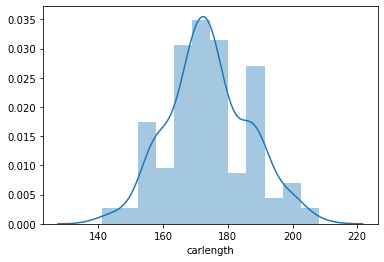

In [29]:
sns.distplot(df['carlength'])
plt.show();

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [31]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 91.4+ KB


In [32]:
dfb['dteday'] = dfb['dteday'].astype('datetime64')

In [33]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [34]:
df_categorical = df.select_dtypes(exclude=['float64','datetime64','int64'])

In [35]:
df_categorical.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [37]:
len(df_categorical.columns)

11

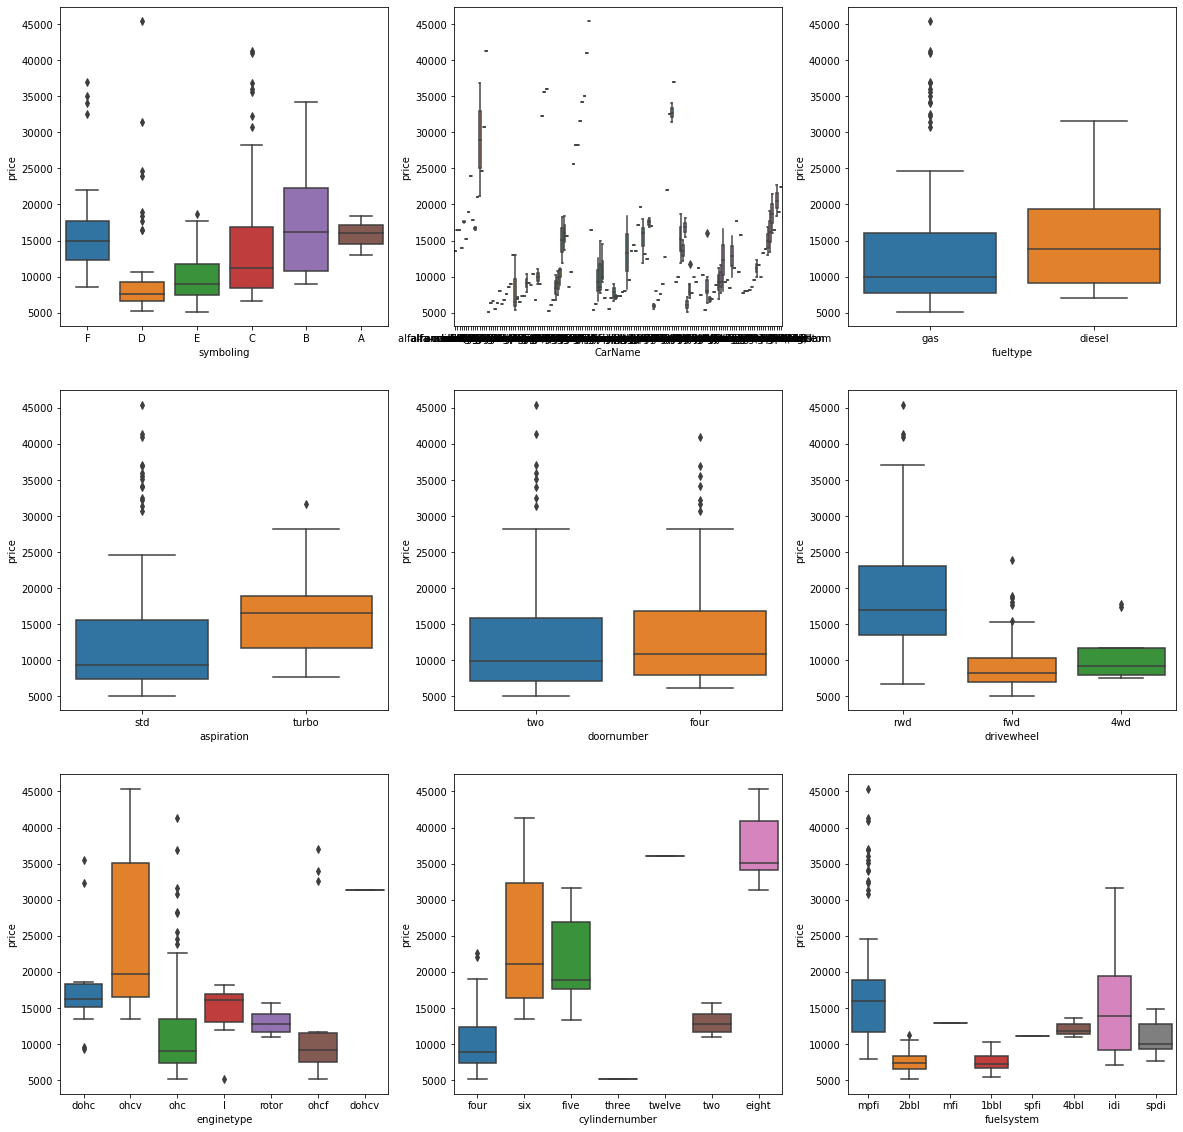

In [39]:
# Visualize all the Categorical Columns

plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'symboling',y='price',data=df)
plt.subplot(3,3,2)
sns.boxplot(x = 'CarName',y='price',data=df)
plt.subplot(3,3,3)
sns.boxplot(x = 'fueltype',y='price',data=df)
plt.subplot(3,3,4)
sns.boxplot(x = 'aspiration',y='price',data=df)
plt.subplot(3,3,5)
sns.boxplot(x = 'doornumber',y='price',data=df)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel',y='price',data=df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype',y='price',data=df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber',y='price',data=df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem',y='price',data=df)
plt.show();

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [42]:
df.describe().columns

Index(['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [44]:
# Converting numeric cols to flaot

Float_var_list = [ 'carlength', 'carwidth', 'carheight',
       'curbweight',  'boreratio', 'stroke', 'compressionratio',
         'citympg', 'highwaympg', 'price']

for var in Float_var_list:
    df[var] = df[var].astype('float')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [46]:
# Numeric cols
df_numeric = df.select_dtypes(include=['float64'])
df_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,21.0,27.0,13495.0
1,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,21.0,27.0,16500.0
2,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,19.0,26.0,16500.0
3,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,24.0,30.0,13950.0
4,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,18.0,22.0,17450.0


In [47]:
df_numeric.shape

(205, 11)

In [48]:
df_numeric.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'boreratio', 'stroke', 'compressionratio', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

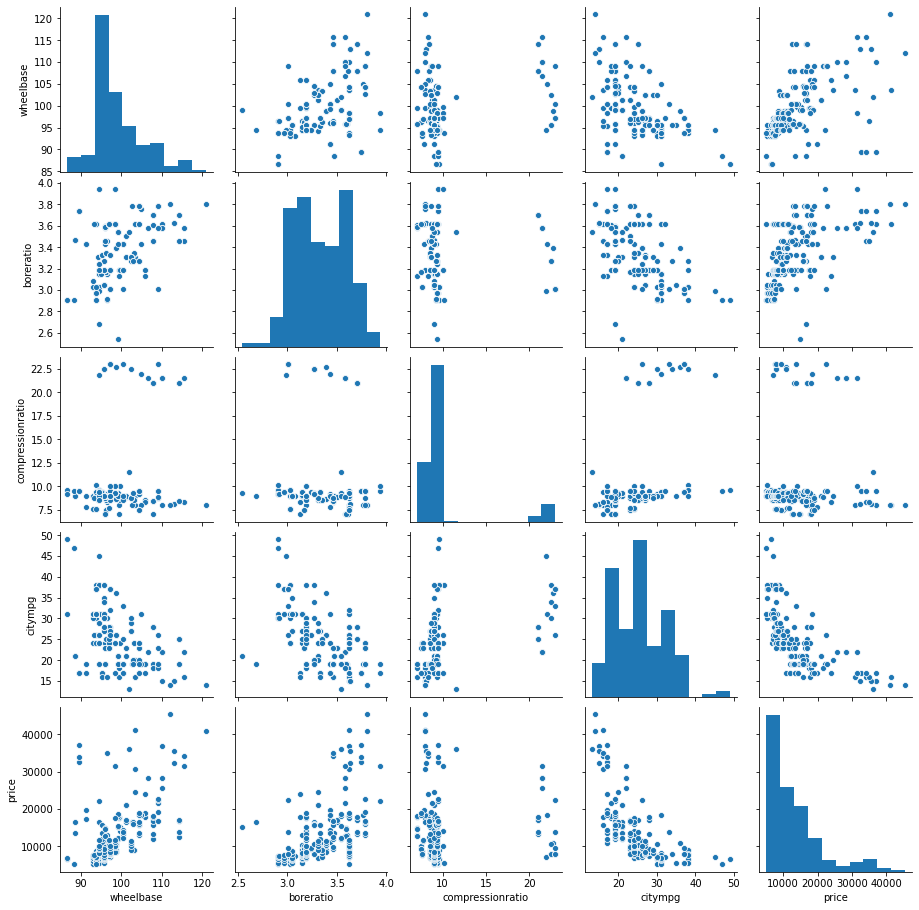

In [49]:
# Visualize Num col

sns.pairplot(df_numeric[['wheelbase', 'boreratio', 'compressionratio', 'citympg',  'price']])
plt.show();

In [50]:
# Correlation Matrix

cor = df_numeric.corr()
cor

,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.488750,0.160959,0.249786,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.606454,0.129533,0.158414,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.559150,0.182942,0.181129,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.171071,-0.055307,0.261214,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.648480,0.168790,0.151362,-0.757414,-0.797465,0.835305
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,1.000000,-0.055909,0.005197,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,-0.055909,1.000000,0.186110,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.005197,0.186110,1.000000,0.324701,0.265201,0.067984
citympg,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.584532,-0.042145,0.324701,1.000000,0.971337,-0.685751
highwaympg,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.587012,-0.043931,0.265201,0.971337,1.000000,-0.697599


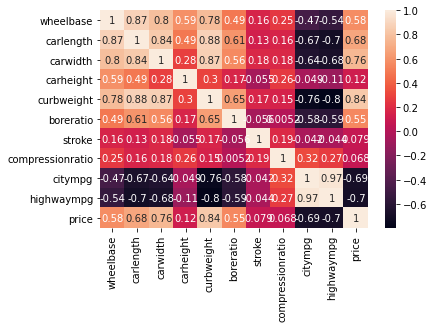

In [52]:
sns.heatmap(cor,annot=True)

In [1]:
# heatmap

mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor,mask=mask,vmax=0.8,square=True,annot=True);

NameError: name 'np' is not defined

In [57]:
df.drop('carlength',axis=1,inplace=True)

In [2]:
df.columns

NameError: name 'df' is not defined

In [59]:
# Data Preparation

In [60]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,F,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,2,F,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,3,D,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500.0
3,4,E,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,5,E,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    float64
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [62]:
# Categorical var

df_categorical = df.select_dtypes(include=['object'])
df_categorical.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [63]:
# Lets do OHE by using the get_dummies()
# https://stackoverflow.com/questions/50176096/removing-redundant-columns-when-using-get-dummies

df_dummies = pd.get_dummies(df_categorical,drop_first=True)
df_dummies.head()

,symboling_B,symboling_C,symboling_D,symboling_E,symboling_F,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [64]:
list(df_categorical.columns)

['symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [65]:
df = df.drop(df_categorical.columns,axis=1)
df.columns

Index(['car_ID', 'wheelbase', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [66]:
df = pd.concat([df,df_dummies], axis=1)

In [67]:
df.head()

,car_ID,wheelbase,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,88.6,64.1,48.8,2548.0,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,2,88.6,64.1,48.8,2548.0,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,3,94.5,65.5,52.4,2823.0,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,4,99.8,66.2,54.3,2337.0,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,5,99.4,66.4,54.3,2824.0,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [68]:
df = df.drop(['car_ID'],axis=1)
df.head()

,wheelbase,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,64.1,48.8,2548.0,130,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
1,88.6,64.1,48.8,2548.0,130,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
2,94.5,65.5,52.4,2823.0,152,2.68,3.47,9.0,154,5000,...,0,0,0,0,0,0,0,1,0,0
3,99.8,66.2,54.3,2337.0,109,3.19,3.40,10.0,102,5500,...,0,0,0,0,0,0,0,1,0,0
4,99.4,66.4,54.3,2824.0,136,3.19,3.40,8.0,115,5500,...,0,0,0,0,0,0,0,1,0,0


In [69]:
df.columns

Index(['wheelbase', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       ...
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object', length=193)

In [70]:
len(df.columns)

193

In [3]:
# Drop Casual and registered now

In [72]:
# Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [73]:
df.describe().columns

Index(['wheelbase', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       ...
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object', length=193)

In [74]:
set(df.describe().columns)

{'CarName_alfa-romero Quadrifoglio',
 'CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 4000',
 'CarName_audi 5000',
 'CarName_audi 5000s (diesel)',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw x4',
 'CarName_bmw x5',
 'CarName_bmw z4',
 'CarName_buick century',
 'CarName_buick century luxus (sw)',
 'CarName_buick century special',
 'CarName_buick electra 225 custom',
 'CarName_buick opel isuzu deluxe',
 'CarName_buick regal sport coupe (turbo)',
 'CarName_buick skyhawk',
 'CarName_buick skylark',
 'CarName_chevrolet impala',
 'CarName_chevrolet monte carlo',
 'CarName_chevrolet vega 2300',
 'CarName_dodge challenger se',
 'CarName_dodge colt (sw)',
 'CarName_dodge colt hardtop',
 'CarName_dodge coronet custom',
 'CarName_dodge coronet custom (sw)',
 'CarName_dodge d200',
 'CarName_dodge dart custom',
 'CarName_dodge monaco (sw)',
 'CarName_dodge rampage',
 'CarNam

In [75]:
var = ['wheelbase','curbweight','enginesize','boreratio','horsepower','carwidth','price']

df[var] = scaler.fit_transform(df[var])

In [76]:
df.head()

,wheelbase,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.058309,0.316667,48.8,0.411171,0.260377,0.664286,2.68,9.0,0.262500,5000,...,0,0,0,0,0,0,0,1,0,0
1,0.058309,0.316667,48.8,0.411171,0.260377,0.664286,2.68,9.0,0.262500,5000,...,0,0,0,0,0,0,0,1,0,0
2,0.230321,0.433333,52.4,0.517843,0.343396,0.100000,3.47,9.0,0.441667,5000,...,0,0,0,0,0,0,0,1,0,0
3,0.384840,0.491667,54.3,0.329325,0.181132,0.464286,3.40,10.0,0.225000,5500,...,0,0,0,0,0,0,0,1,0,0
4,0.373178,0.508333,54.3,0.518231,0.283019,0.464286,3.40,8.0,0.279167,5500,...,0,0,0,0,0,0,0,1,0,0


In [77]:
# Model Building

In [78]:
X = df.drop('price', axis=1)
y=df['price']

In [79]:
X.shape

(205, 192)

In [80]:
y.shape

(205,)

In [81]:
# divide the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)